In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
modeldata = pd.read_csv("model_Data.csv")

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
modeldata['Traffic_Signal'] = modeldata["Traffic_Signal"].apply(lambda x: True if x else False)
modeldata['Station'] = modeldata["Station"].apply(lambda x: True if x else False)
modeldata['Junction'] = modeldata["Junction"].apply(lambda x: True if x else False)
modeldata['Crossing'] = modeldata["Crossing"].apply(lambda x: True if x else False)
modeldata['Sunrise_Sunset'] = modeldata["Sunrise_Sunset"].apply(lambda x: True if x == 'Day' else False)
weather_categories = pd.get_dummies(modeldata['weather_keyword'],drop_first=True)
modeldata.drop(['weather_keyword'],axis=1,inplace=True)
modeldata = pd.concat([modeldata,weather_categories],axis=1)



In [5]:
modeldata.columns

Index(['Start_Lat', 'Start_Lng', 'Cluster', 'Weekday', 'Hour', 'Date', 'Month',
       'Sunrise_Sunset', 'Traffic_Signal', 'Station', 'Junction', 'Crossing',
       'Temperature(F)', 'Wind_Speed(mph)', 'Wind_Direction', 'Pressure(in)',
       'Visibility(mi)', 'Humidity(%)', 'Accident', 'cloudy', 'fog',
       'overcast', 'rain', 'snow', 'thunderstorm', 'wind'],
      dtype='object')

In [4]:
y = modeldata['Accident']
#X = modeldata.drop(labels=['Wind_Direction'], axis = 1, inplace=True)
#y = modeldata['Accident']
modeldata.drop(labels=['Wind_Direction','Accident'], axis = 1, inplace=True)
X = modeldata


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [10]:
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
pred = rfc.predict(X_test)

In [18]:
rfc.n_estimators

300

In [17]:

rfc.

24

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[32427  4460]
 [ 6242 18316]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     36887
           1       0.80      0.75      0.77     24558

    accuracy                           0.83     61445
   macro avg       0.82      0.81      0.82     61445
weighted avg       0.82      0.83      0.82     61445



In [9]:
from sklearn.model_selection import GridSearchCV

In [11]:
# tune models GridsearchCV 

parameters = {
    'n_estimators'      : [250,300,350],
    'max_depth'         : [25, 30, 35],
    'random_state'      : [0],
    #'max_features': ['auto'],
    #'criterion' :['mae']
}


gs = GridSearchCV(RandomForestClassifier(),parameters,scoring='neg_mean_absolute_error',cv=3)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [18]:
gs.best_estimator_.fit(X_train,y_train)
pred = gs.predict(X_test)

In [19]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[32185  4651]
 [ 5933 18676]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86     36836
           1       0.80      0.76      0.78     24609

    accuracy                           0.83     61445
   macro avg       0.82      0.82      0.82     61445
weighted avg       0.83      0.83      0.83     61445



In [60]:
from sklearn.model_selection import validation_curve
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = [100,200,300,400,500], cv = 3)

In [62]:
test_scoreNum

array([[0.80421   , 0.80446109, 0.80060265],
       [0.80902262, 0.8115754 , 0.80719412],
       [0.81224498, 0.81310289, 0.80968424],
       [0.81435835, 0.81203574, 0.80922388],
       [0.81406541, 0.81488146, 0.80932851]])

In [22]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'max_depth', 
                                param_range = [35,40,45,50], cv = 3)

C:\Users\sablo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sablo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sablo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sablo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sablo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

In [23]:
test_scoreNum

array([[0.73775397, 0.7255702 , 0.73785311],
       [0.74714904, 0.75379787, 0.74942457],
       [0.73277395, 0.72266164, 0.73216154],
       [0.74032768, 0.74023854, 0.74308433]])

In [8]:
import pickle
# Creating a pickle file for the classifier
filename = 'accident-prediction-rfc-model.pkl'
pickle.dump(gs.best_estimator_, open(filename, 'wb'))

NameError: name 'gs' is not defined

In [11]:
X_test.iloc[1].values

array([27.872295, -82.745537, 815, 3, 7, 2, 8, False, True, False, False,
       False, 62.1, 4.6, 30.09, 10.0, 93.0, 0, 0, 0, 0, 0, 0, 0],
      dtype=object)

In [13]:
y_test.iloc[1]

0

# XGBoost Model

In [12]:
import numpy as np

from scipy.stats import uniform, randint

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

In [9]:
from sklearn.model_selection import StratifiedKFold

In [14]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[30472  6263]
 [ 3261 21449]]


In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86     36735
           1       0.77      0.87      0.82     24710

    accuracy                           0.84     61445
   macro avg       0.84      0.85      0.84     61445
weighted avg       0.85      0.84      0.85     61445



In [28]:
xgb_model_2 = xgb.XGBClassifier(objective="binary:logistic", n_estimators=100, random_state=42, eval_metric=["auc", "error", "error@0.6"], verbosity = 
                                1, verbose = True)

In [31]:
eval_set = [(X_train, y_train)]
xgb_model_2.fit(X_train, y_train, eval_set = eval_set)

[18:06:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.65029	validation_0-error:0.37402	validation_0-error@0.6:0.39829
[1]	validation_0-auc:0.67773	validation_0-error:0.37797	validation_0-error@0.6:0.39535
[2]	validation_0-auc:0.73636	validation_0-error:0.34514	validation_0-error@0.6:0.38974
[3]	validation_0-auc:0.75328	validation_0-error:0.33672	validation_0-error@0.6:0.38209
[4]	validation_0-auc:0.76932	validation_0-error:0.32396	validation_0-error@0.6:0.36426
[5]	validation_0-auc:0.78042	validation_0-error:0.31142	validation_0-error@0.6:0.36095
[6]	validation_0-auc:0.78605	validation_0-error:0.30676	validation_0-error@0.6:0.35248
[7]	va

[89]	validation_0-auc:0.93876	validation_0-error:0.13554	validation_0-error@0.6:0.14540
[90]	validation_0-auc:0.93904	validation_0-error:0.13540	validation_0-error@0.6:0.14506
[91]	validation_0-auc:0.93912	validation_0-error:0.13530	validation_0-error@0.6:0.14502
[92]	validation_0-auc:0.93936	validation_0-error:0.13489	validation_0-error@0.6:0.14471
[93]	validation_0-auc:0.93958	validation_0-error:0.13458	validation_0-error@0.6:0.14450
[94]	validation_0-auc:0.93986	validation_0-error:0.13447	validation_0-error@0.6:0.14405
[95]	validation_0-auc:0.94005	validation_0-error:0.13424	validation_0-error@0.6:0.14378
[96]	validation_0-auc:0.94036	validation_0-error:0.13391	validation_0-error@0.6:0.14359
[97]	validation_0-auc:0.94059	validation_0-error:0.13348	validation_0-error@0.6:0.14315
[98]	validation_0-auc:0.94082	validation_0-error:0.13314	validation_0-error@0.6:0.14272
[99]	validation_0-auc:0.94119	validation_0-error:0.13293	validation_0-error@0.6:0.14206


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              eval_metric=['auc', 'error', 'error@0.6'], gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbose=True,
              verbosity=1)

In the above evaluation of auc and error, we see that the model is performing well. The AUC values reach close to 1 as the model iterations are complete. The errors also keep reducing till they get almost stagnant at the end. This means that our model is working good and we can start the cross validation process. 

In [33]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(5, 8), # default 3
    "n_estimators": randint(100, 200), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=kfold, verbose=1, n_jobs=1, return_train_score=True)


In [34]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 237.8min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=7, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002ADF232A548>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002

In [36]:
xgboost_best = search.best_estimator_

In [57]:
xgboost_best.fit(X_train, y_train, eval_set=[(X_train,y_train), (X_test, y_test)], eval_metric=["auc", "logloss", "error"],
                 early_stopping_rounds=10)

y_pred = xgboost_best.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[0]	validation_0-auc:0.61770	validation_0-logloss:0.67539	validation_0-error:0.38208	validation_1-auc:0.60693	validation_1-logloss:0.67658	validation_1-error:0.38955
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-auc:0.69883	validation_0-logloss:0.65439	validation_0-error:0.36214	validation_1-auc:0.68940	validation_1-logloss:0.65633	validation_1-error:0.36932
[2]	validation_0-auc:0.71513	validation_0-logloss:0.64577	validation_0-error:0.36439	validation_1-auc:0.70311	validation_1-logloss:0.64873	validation_1-error:0.37311
[3]	validation_0-auc:0.75189	validation_0-logloss:0.62695	validation_0-error:0.34473	validation_1-auc:0.74053	validation_1-logloss:0.63050	validation_1-error:0.35318
[4]	validation_0-auc:0.77019	validation_0-logloss:0.61170	validation_0-error:0.33267	validation_1-auc:0.75912	validation_1-logloss:0.61588	validation_1-error:0.34131
[5]	valid

[49]	validation_0-auc:0.92616	validation_0-logloss:0.34866	validation_0-error:0.15302	validation_1-auc:0.90975	validation_1-logloss:0.37059	validation_1-error:0.17132
[50]	validation_0-auc:0.92876	validation_0-logloss:0.34460	validation_0-error:0.14972	validation_1-auc:0.91214	validation_1-logloss:0.36700	validation_1-error:0.16830
[51]	validation_0-auc:0.92929	validation_0-logloss:0.34340	validation_0-error:0.14915	validation_1-auc:0.91248	validation_1-logloss:0.36614	validation_1-error:0.16822
[52]	validation_0-auc:0.93031	validation_0-logloss:0.34102	validation_0-error:0.14765	validation_1-auc:0.91338	validation_1-logloss:0.36419	validation_1-error:0.16740
[53]	validation_0-auc:0.93074	validation_0-logloss:0.33998	validation_0-error:0.14716	validation_1-auc:0.91360	validation_1-logloss:0.36352	validation_1-error:0.16665
[54]	validation_0-auc:0.93254	validation_0-logloss:0.33680	validation_0-error:0.14516	validation_1-auc:0.91529	validation_1-logloss:0.36080	validation_1-error:0.1647

[99]	validation_0-auc:0.95073	validation_0-logloss:0.29460	validation_0-error:0.12154	validation_1-auc:0.92448	validation_1-logloss:0.33543	validation_1-error:0.15188
[100]	validation_0-auc:0.95108	validation_0-logloss:0.29396	validation_0-error:0.12127	validation_1-auc:0.92460	validation_1-logloss:0.33519	validation_1-error:0.15155
[101]	validation_0-auc:0.95127	validation_0-logloss:0.29332	validation_0-error:0.12087	validation_1-auc:0.92468	validation_1-logloss:0.33479	validation_1-error:0.15135
[102]	validation_0-auc:0.95145	validation_0-logloss:0.29302	validation_0-error:0.12067	validation_1-auc:0.92470	validation_1-logloss:0.33477	validation_1-error:0.15166
[103]	validation_0-auc:0.95193	validation_0-logloss:0.29181	validation_0-error:0.11985	validation_1-auc:0.92508	validation_1-logloss:0.33394	validation_1-error:0.15119
[104]	validation_0-auc:0.95226	validation_0-logloss:0.29115	validation_0-error:0.11951	validation_1-auc:0.92507	validation_1-logloss:0.33382	validation_1-error:0

[148]	validation_0-auc:0.96343	validation_0-logloss:0.26247	validation_0-error:0.10321	validation_1-auc:0.93113	validation_1-logloss:0.31857	validation_1-error:0.14195
[149]	validation_0-auc:0.96372	validation_0-logloss:0.26175	validation_0-error:0.10280	validation_1-auc:0.93127	validation_1-logloss:0.31820	validation_1-error:0.14175
[150]	validation_0-auc:0.96379	validation_0-logloss:0.26161	validation_0-error:0.10259	validation_1-auc:0.93127	validation_1-logloss:0.31820	validation_1-error:0.14198
[151]	validation_0-auc:0.96419	validation_0-logloss:0.26031	validation_0-error:0.10213	validation_1-auc:0.93155	validation_1-logloss:0.31733	validation_1-error:0.14182
[152]	validation_0-auc:0.96438	validation_0-logloss:0.25983	validation_0-error:0.10188	validation_1-auc:0.93180	validation_1-logloss:0.31687	validation_1-error:0.14149
[153]	validation_0-auc:0.96455	validation_0-logloss:0.25944	validation_0-error:0.10162	validation_1-auc:0.93192	validation_1-logloss:0.31663	validation_1-error:

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88     36735
           1       0.79      0.89      0.84     24710

    accuracy                           0.86     61445
   macro avg       0.86      0.87      0.86     61445
weighted avg       0.87      0.86      0.86     61445



The accuracy of the model considerably improves after doing a RandomizedSearchCV. Lets see the finer details of the final algorithm

In [48]:
xgboost_best.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.889679286375859,
              gamma=0.006547228294166818, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.22906121160501317,
              max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.984428126987782, tree_method='exact',
              validate_parameters=1, verbosity=None)>

In [56]:
xgboost_best.evals_result()

{'validation_0': {'auc': [0.6177,
   0.698826,
   0.71513,
   0.75189,
   0.770189,
   0.807575,
   0.813634,
   0.829424,
   0.831332,
   0.847915,
   0.855593,
   0.857697,
   0.862982,
   0.863406,
   0.864645,
   0.870108,
   0.8779,
   0.878441,
   0.880644,
   0.884652,
   0.887185,
   0.888513,
   0.889342,
   0.896092,
   0.900788,
   0.90215,
   0.903975,
   0.906931,
   0.908143,
   0.909759,
   0.909988,
   0.912067,
   0.912988,
   0.914422,
   0.915094,
   0.915474,
   0.916847,
   0.91736,
   0.918045,
   0.91871,
   0.919776,
   0.921686,
   0.922087,
   0.922383,
   0.923418,
   0.923817,
   0.924258,
   0.924431,
   0.924782,
   0.926162,
   0.928764,
   0.92929,
   0.930306,
   0.930743,
   0.932545,
   0.933262,
   0.933831,
   0.934435,
   0.93513,
   0.935424,
   0.935762,
   0.936101,
   0.936678,
   0.937504,
   0.938057,
   0.938672,
   0.939278,
   0.939742,
   0.939786,
   0.940422,
   0.940836,
   0.941141,
   0.941372,
   0.941669,
   0.941852,
   0.942864,


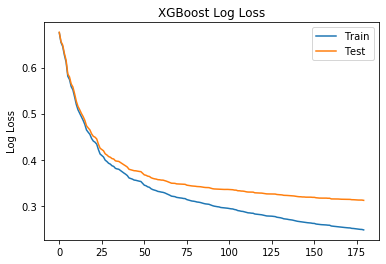

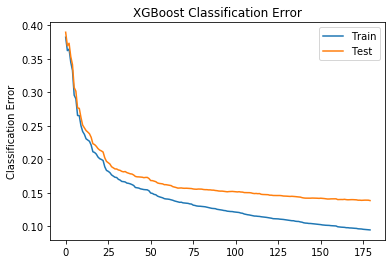

In [64]:
results = xgboost_best.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [65]:
pd.Series(data=xgboost_best.feature_importances_, index=X.columns.array)

Start_Lat          0.017530
Start_Lng          0.017236
Cluster            0.017170
Weekday            0.016825
Hour               0.120964
Date               0.025708
Month              0.093288
Sunrise_Sunset     0.230045
Traffic_Signal     0.032905
Station            0.013980
Junction           0.011829
Crossing           0.015700
Temperature(F)     0.065905
Wind_Speed(mph)    0.030234
Pressure(in)       0.029224
Visibility(mi)     0.018162
Humidity(%)        0.075339
cloudy             0.012704
fog                0.023167
overcast           0.022313
rain               0.038553
snow               0.000000
thunderstorm       0.068685
wind               0.002537
dtype: float32

In [66]:
import pickle
# Creating a pickle file for the classifier
filename = 'accident-prediction-xgb-model.pkl'
pickle.dump(xgboost_best, open(filename, 'wb'))